In [409]:
import numpy as np
import matplotlib.pyplot as plt

In [410]:
SIZE = 10000
STD = 5

In [411]:
def error_model(size, mean, std):
    return np.random.normal(mean, std, size)

In [412]:
def monte_carlo(size, a, b):
    return np.random.rand(size) * (b - a) + a

In [413]:
def change_model(data):
    return data ** 2 / 3

In [414]:
def experimental_data(data, error):
    return np.add(data, error)

In [415]:
def generate_data(size):
    error = error_model(size, mean=0, std=STD)
    rand_data = monte_carlo(size, -10, 10)
    rand_data = np.sort(rand_data)
    trend_data = change_model(rand_data)
    experiment_data = experimental_data(trend_data, error)
    return rand_data, trend_data, experiment_data

In [416]:
def MNK(x, y):
    y_in = np.reshape(y, (-1, 1))
    F = np.ones((len(x), 3))
    F[::, 1] = x
    F[::, 2] = x ** 2
    FT = F.T
    FT_F = FT.dot(F)
    FT_F_inv = np.linalg.inv(FT_F)
    FT_F_inv_FT = FT_F_inv.dot(FT)
    C = FT_F_inv_FT.dot(y_in)
    y_out = F.dot(C)
    return y_out

In [417]:
def remove_outliers(x, y):
    data = np.array(list(zip(x, y)))
    window_size = 200
    
    i = 0
    while i < len(data) - window_size:
        mnk = MNK(data[i:i + window_size, 0], data[i:i + window_size, 1])
        std = np.std(data[i:i + window_size, 1])

        if abs(data[i + window_size - 1, 1] - mnk[-1]) > 3 * std:
            data = np.delete(data, i + window_size - 1, axis=0)
        else:
            i += 1
            
    return data[:, 0], data[:, 1]

In [418]:
def alpha_beta_filter(y_in, iter):
    y_out_ab = np.zeros((iter, 1))
    t0 = 1
    y_speed_retro = (y_in[1, 0] - y_in[0, 0]) / t0
    y_extra = y_in[0, 0] + y_speed_retro
    alpha = 1
    beta = 12
    y_out_ab[0, 0] = y_in[0, 0] + alpha * y_in[0, 0]
    for i in range(1, iter):
        y_out_ab[i, 0] = y_extra + alpha * (y_in[i, 0] - y_extra)
        y_speed = y_speed_retro + (beta / t0) * (y_in[i, 0] - y_extra)
        y_speed_retro = y_speed
        y_extra = y_out_ab[i, 0] + y_speed_retro
        alpha = 2 * (2 * i - 1) / (i * (i + 1))
        beta = 6 / (i * (i + 1))
    return y_out_ab

In [419]:
def stats_info(data):
    print('Mean: ', np.mean(data))
    print('Median: ', np.median(data))
    print('Variance: ', np.var(data))
    print('Std: ', np.std(data), '\n')

In [420]:
rand_data, trend_data, experiment_data = generate_data(SIZE)
yout = MNK(rand_data, experiment_data)
rand_data_2, experiment_data_2 = remove_outliers(rand_data, experiment_data)
yout_2 = alpha_beta_filter(np.reshape(experiment_data_2, (-1, 1)), len(experiment_data_2))

In [421]:
print('Random data:')
stats_info(rand_data)

Random data:
Mean:  -0.06332819191971266
Median:  -0.09557520518724516
Variance:  33.59607675095445
Std:  5.796212276215774 



In [422]:
print('Trend data stats with outliers:')
stats_info(trend_data)

Trend data stats with outliers:
Mean:  11.20002907028209
Median:  8.478624309165722
Variance:  99.45854165646078
Std:  9.97289033612928 



In [423]:
print('Experiment data stats with outliers:')
stats_info(experiment_data)

Experiment data stats with outliers:
Mean:  11.16657719322991
Median:  9.275464496479826
Variance:  124.46170397709818
Std:  11.156240584403788 



In [424]:
print('Random data after removing outliers stats:')
stats_info(rand_data_2)

Random data after removing outliers stats:
Mean:  -0.06142966296227947
Median:  -0.09750112732976213
Variance:  33.60418550811603
Std:  5.796911721607983 



In [425]:
print('Experiment data after removing outliers stats:')
stats_info(experiment_data_2)

Experiment data after removing outliers stats:
Mean:  11.184471021650127
Median:  9.280507386252966
Variance:  123.97215173708528
Std:  11.134278231528315 



In [426]:
print('Smoothed data stats:')
stats_info(yout)

Smoothed data stats:
Mean:  11.166577193229914
Median:  8.449169473862991
Variance:  99.47919869832548
Std:  9.973925942091483 



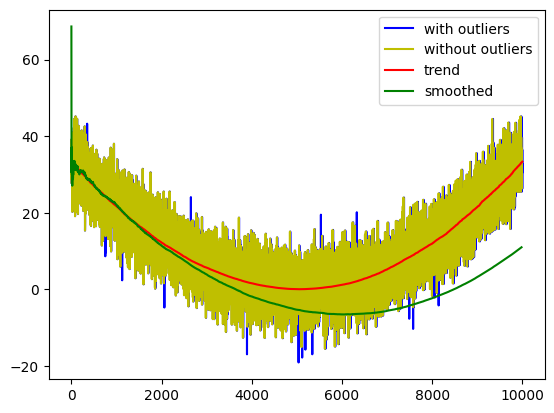

In [427]:
plt.plot(experiment_data, 'b', label='with outliers')
plt.plot(experiment_data_2, 'y', label='without outliers')
plt.plot(trend_data, 'r', label='trend')
plt.plot(yout_2, 'g', label='smoothed')
plt.legend()
plt.show()

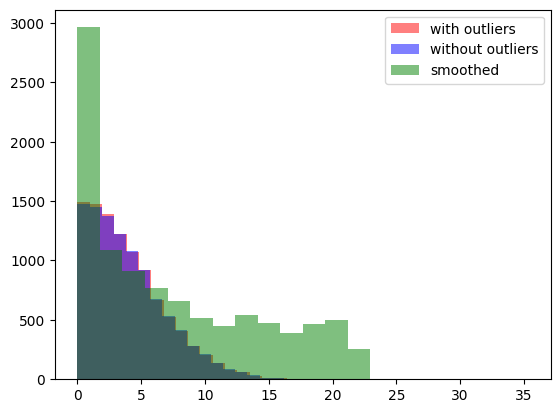

In [428]:
plt.hist(abs(experiment_data - trend_data), bins=20, facecolor='red', alpha=0.5, label='with outliers')
plt.hist(abs(experiment_data_2 - change_model(rand_data_2)), bins=20, facecolor='blue', alpha=0.5, label='without outliers')
plt.hist(abs(yout_2.reshape((-1,)) - change_model(rand_data_2)), bins=20, facecolor='green', alpha=0.5, label='smoothed')
plt.legend()
plt.show()